In [1]:
from neuron import h, gui

--No graphics will be displayed.


In [2]:
soma = h.Section(name='soma')

In [3]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

In [4]:
dir(soma)

['L',
 'Ra',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'disconnect',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'subtree',
 'trueparentseg',
 'uninsert',
 'wholetree',
 'x3d',
 'y3d',
 'z3d']

In [5]:
help(soma.connect)

Help on built-in function connect:

connect(...) method of nrn.Section instance
    childSection.connect(parentSection, [parentX], [childEnd]) or
    childSection.connect(parentSegment, [childEnd])



In [6]:
soma.insert('pas')

soma

In [7]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) ={}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) =<class 'nrn.Segment'>


In [8]:
mech = soma(0.5).pas
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'e', 'g', 'i', 'is_ion', 'name', 'segment']


In [9]:
print(mech.g)
print(soma(0.5).pas.g)

0.001
0.001


In [10]:
asyn = h.AlphaSynapse(soma(0.5))

In [11]:
dir(asyn)

['__abs__',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'alpha',
 'baseattr',
 'e',
 'get_loc',
 'get_segment',
 'gmax',
 'has_loc',
 'hname',
 'hocobjptr',
 'i',
 'loc',
 'onset',
 'same',
 'tau']

In [12]:
print("asyn.e = {}".format(asyn.e))
print("asyn.gmax = {}".format(asyn.gmax))
print("asyn.onset = {}".format(asyn.onset))
print("asyn.tau = {}".format(asyn.tau))

asyn.e = 0.0
asyn.gmax = 0.0
asyn.onset = 0.0
asyn.tau = 0.1


In [13]:
asyn.onset = 20
asyn.gmax = 1

In [14]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
	insert pas { g_pas=0.001 e_pas=-70}
	insert AlphaSynapse { onset=20 tau=0.1 gmax=1 e=0}
}


1.0

In [15]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[4]

In [16]:
h.tstop = 40.0
h.run()

0.0

In [17]:
h.load_file('stdrun.hoc')

1.0

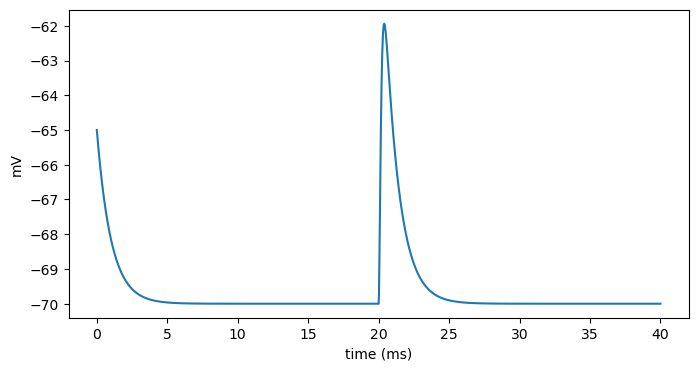

In [18]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()

In [19]:
# Pickle
import pickle
with open('t_vec.p', 'wb') as t_vec_file:
    pickle.dump(t_vec, t_vec_file)
with open('v_vec.p', 'wb') as v_vec_file:
    pickle.dump(v_vec, v_vec_file)

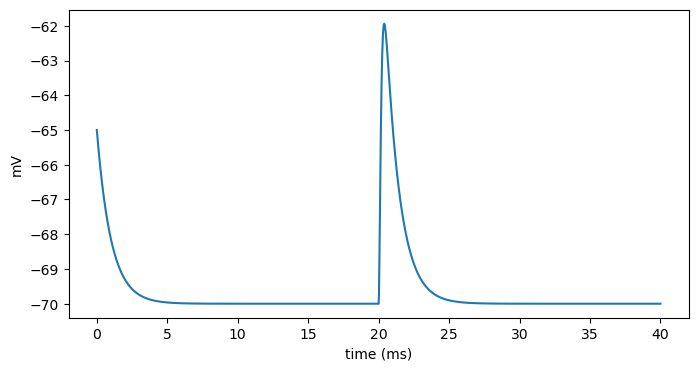

In [20]:
from neuron import h, gui
from matplotlib import pyplot
import pickle

# Unpickle
with open('t_vec.p', 'rb') as t_vec_file:
    t_vec = pickle.load(t_vec_file)
with open('v_vec.p', 'rb') as vec_file:
    v_vec = pickle.load(vec_file)

# Confirm
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()